In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")

from sklearn import set_config
set_config(transform_output = "pandas")

In [3]:
X_train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv', index_col = 'Id')
y_train = X_train[['SalePrice']]
X_test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv',index_col = 'Id')
sample_submission = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')

In [4]:
print(len(X_train))
print(X_train['SalePrice'].mean())
X_train.head(5)

1460
180921.19589041095


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
X_train.select_dtypes(include=['object','category']).nunique()

MSZoning          5
Street            2
Alley             2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        3
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
PoolQC            3
Fence             4
MiscFeature       4
SaleType          9
SaleCondition     6
dtype: int64

In [6]:
missing = X_train.isna().sum()
missing = missing[missing>0]
missing

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [7]:
discrete_features = [col for col in missing.index if X_train[col].dtype in ['object', 'category']]
num_features = [col for col in missing.index if X_train[col].dtype not in ['object', 'category']]


for col in discrete_features:
    print(col, X_train[col].unique())

print()
print('Num_missing:')

for col in num_features:
    print(col, X_train[col].nunique())


Alley [nan 'Grvl' 'Pave']
MasVnrType ['BrkFace' nan 'Stone' 'BrkCmn']
BsmtQual ['Gd' 'TA' 'Ex' nan 'Fa']
BsmtCond ['TA' 'Gd' nan 'Fa' 'Po']
BsmtExposure ['No' 'Gd' 'Mn' 'Av' nan]
BsmtFinType1 ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']
BsmtFinType2 ['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']
Electrical ['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan]
FireplaceQu [nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
GarageType ['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']
GarageFinish ['RFn' 'Unf' 'Fin' nan]
GarageQual ['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
GarageCond ['TA' 'Fa' nan 'Gd' 'Po' 'Ex']
PoolQC [nan 'Ex' 'Fa' 'Gd']
Fence [nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
MiscFeature [nan 'Shed' 'Gar2' 'Othr' 'TenC']

Num_missing:
LotFrontage 110
MasVnrArea 327
GarageYrBlt 97


It appears that missing data mostly from the specifics of house, i.e. some not having garage, pool, fireplace etc. Categorical should be imputed with 'missing', numerical with 0 or something similar.

In [8]:
'''X_train[X_train['LotFrontage'].isna()]['LotConfig']'''
'''X_train[X_train['MasVnrType'].isna()]['MasVnrArea']'''
print(X_train['SalePrice'].mean())
print(X_train.loc[X_train['MiscFeature'] == 'Othr','SalePrice'].mean())

180921.19589041095
94000.0


In [9]:
from sklearn.impute import SimpleImputer

def input_const(col,val):
    X_train.loc[X_train[col].isna(),col] = val
    X_test.loc[X_test[col].isna(),col] = val
    
def input_col(col,source_col):
    X_train.loc[X_train[col].isna(),col] = X_train.loc[X_train[col].isna(),source_col]
    X_test.loc[X_test[col].isna(),col] = X_test.loc[X_test[col].isna(),source_col]
    
input_const('LotFrontage', 0)
input_const('MasVnrArea', 0)
input_const('MasVnrType', 'Absent')
input_col('GarageYrBlt', 'YearBuilt')

grg = ['GarageType','GarageFinish','GarageQual','GarageCond']
for col in grg:
    input_const(col,'Absent')

input_const('Fence', 'Absent')
input_const('PoolQC', 'Absent')
input_const('FireplaceQu', 'Absent')
input_const('Alley', 'Absent')
input_const('MiscFeature', 'Absent')


bsmt = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']
for col in bsmt:
    input_const(col,'Absent')


#impute rest with mean/most common
cat_imputer = SimpleImputer(strategy = 'most_frequent')
num_imputer = SimpleImputer(strategy = 'mean')

cat_cols = [col for col in X_train.columns if X_train[col].dtype not in ['int64','float64']]
num_cols = [col for col in X_train.columns if X_train[col].dtype in ['int64','float64']]
num_cols.remove('SalePrice')

X_train[cat_cols] = cat_imputer.fit_transform(X_train[cat_cols])
X_test[cat_cols] = cat_imputer.transform(X_test[cat_cols])

X_train[num_cols] = num_imputer.fit_transform(X_train[num_cols])
X_test[num_cols] = num_imputer.transform(X_test[num_cols])
    
missing = X_train.isna().sum()
missing = missing[missing>0]
missing

#for some checking
X_train_copy = X_train
X_test_copy = X_test

<Axes: xlabel='mi', ylabel='index'>

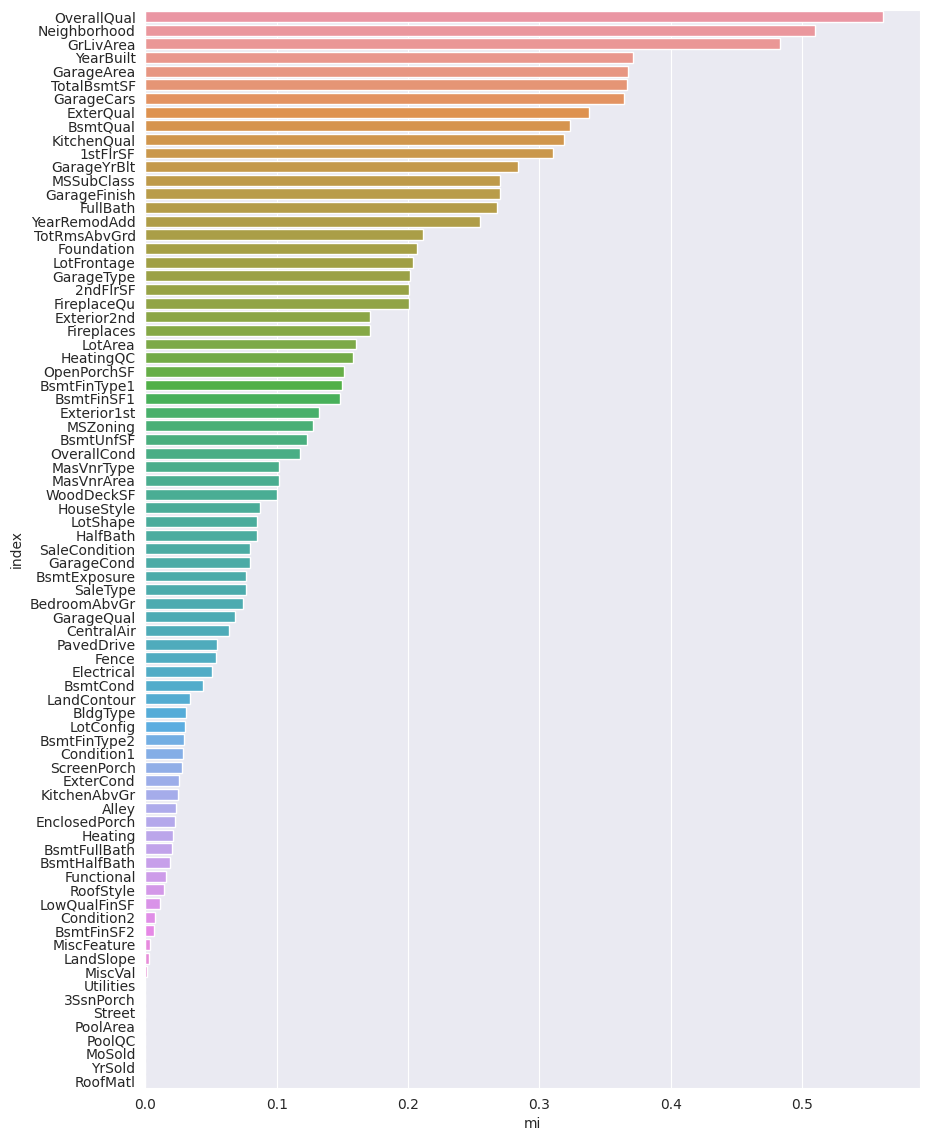

In [10]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import OrdinalEncoder


discrete_features = [col for col in X_train.columns if X_train[col].dtype in ['object', 'category']]
#X = X_train.select_dtypes(include=['int64','float64']).dropna()

#X = X_train.dropna()
X = X_train.copy()
enc = OrdinalEncoder()
X[discrete_features] = enc.fit_transform(X[discrete_features])


mi = mutual_info_regression(X, X['SalePrice'],random_state=0)
mi = pd.DataFrame({"mi":mi}, index=X.columns)
mi = mi.sort_values(by='mi', ascending=False).reset_index()
mi = mi.drop(index=0)

plt.figure(figsize=(10,14))
sns.barplot(data = mi, y='index', x='mi', orient='h')

In [11]:
for val in X_train_copy['PoolQC'].unique():
    print(X_train_copy.loc[X_train_copy['PoolQC'] == val,'SalePrice'].shape[0],X_train_copy.loc[X_train_copy['PoolQC'] == val,'SalePrice'].mean())

1453 180404.66345492084
2 490000.0
2 215500.0
3 201990.0


Let's drop up to 'LandContour'

In [12]:
pos = mi[mi['index'] == 'LandContour'].index.values[0]
to_drop = mi.loc[53:,'index'].values
to_drop = list(to_drop)
X_train = X_train.drop(columns = to_drop)
X_test = X_test.drop(columns = to_drop)
X_train.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,Neighborhood,BldgType,HouseStyle,OverallQual,...,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,Fence,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60.0,RL,65.0,8450.0,Reg,Lvl,CollgCr,1Fam,2Story,7.0,...,548.0,TA,TA,Y,0.0,61.0,Absent,WD,Normal,208500
2,20.0,RL,80.0,9600.0,Reg,Lvl,Veenker,1Fam,1Story,6.0,...,460.0,TA,TA,Y,298.0,0.0,Absent,WD,Normal,181500
3,60.0,RL,68.0,11250.0,IR1,Lvl,CollgCr,1Fam,2Story,7.0,...,608.0,TA,TA,Y,0.0,42.0,Absent,WD,Normal,223500
4,70.0,RL,60.0,9550.0,IR1,Lvl,Crawfor,1Fam,2Story,7.0,...,642.0,TA,TA,Y,0.0,35.0,Absent,WD,Abnorml,140000
5,60.0,RL,84.0,14260.0,IR1,Lvl,NoRidge,1Fam,2Story,8.0,...,836.0,TA,TA,Y,192.0,84.0,Absent,WD,Normal,250000


<Axes: xlabel='mi', ylabel='index'>

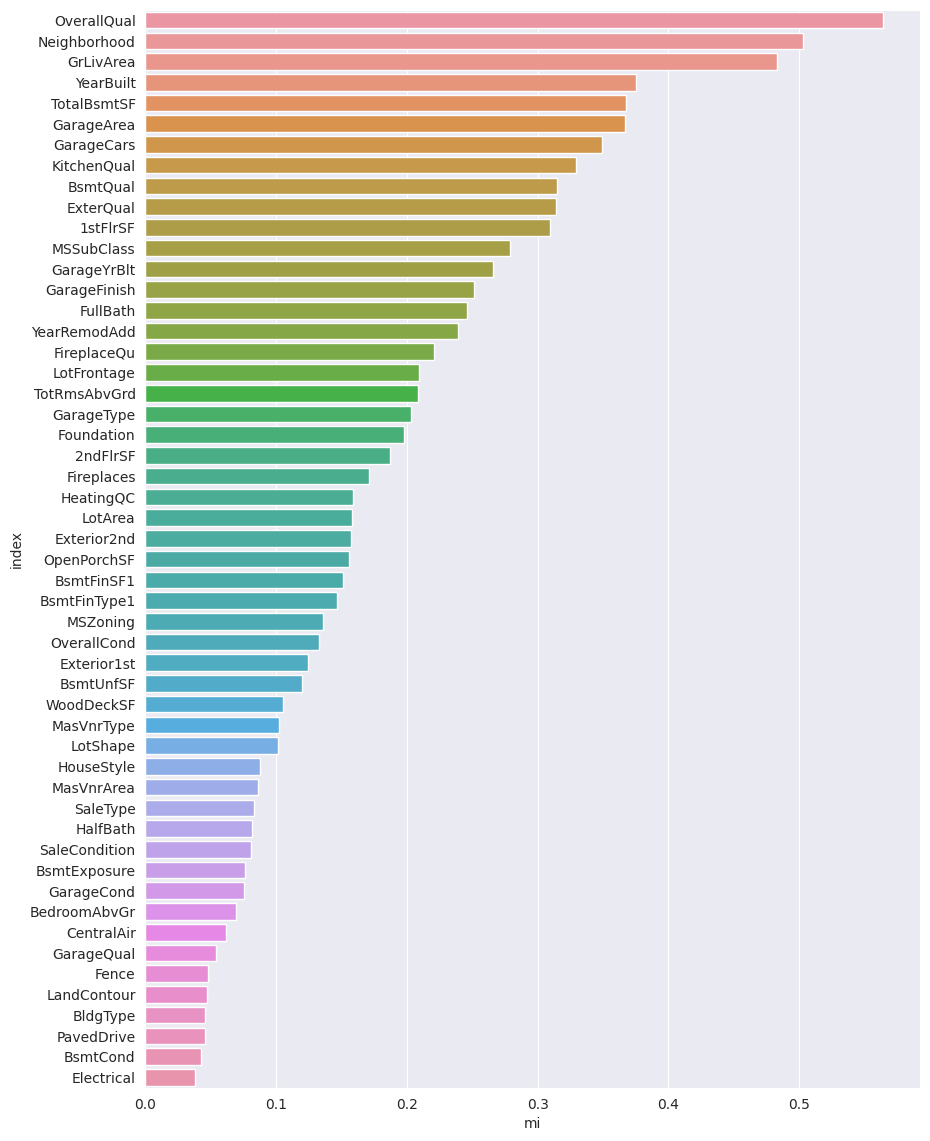

In [13]:
discrete_features = [col for col in X_train.columns if X_train[col].dtype in ['object', 'category']]
#X = X_train.select_dtypes(include=['int64','float64']).dropna()

#X = X_train.dropna()
X = X_train.copy()
enc = OrdinalEncoder()
X[discrete_features] = enc.fit_transform(X[discrete_features])


mi = mutual_info_regression(X, X['SalePrice'])
mi = pd.DataFrame({"mi":mi}, index=X.columns)
mi = mi.sort_values(by='mi', ascending=False).reset_index()
mi = mi.drop(index=0)

plt.figure(figsize=(10,14))
sns.barplot(data = mi, y='index', x='mi', orient='h')

Let's do PCA on numerical features

In [14]:
from sklearn.preprocessing import StandardScaler

numerical_cols = X_train.select_dtypes(include=['float64', 'int64']).columns.values
numerical_cols = list(numerical_cols)
numerical_cols.remove('MSSubClass')
numerical_cols.remove('OverallQual')
numerical_cols.remove('OverallCond')
numerical_cols.remove('SalePrice')

skew = X_train[numerical_cols].skew()
skew_cols = list(skew[skew > 0.75].index.values)

X_train[skew_cols] = np.log1p(X_train[skew_cols])
X_test[skew_cols] = np.log1p(X_test[skew_cols])


scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

#
X_train_copy[numerical_cols] = X_train[numerical_cols]
X_test_copy[numerical_cols] = X_test[numerical_cols]

In [15]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train[numerical_cols])

for i, val in enumerate(pca.explained_variance_ratio_):
    print(f'Feature {i}, explained variance: {val}')

Feature 0, explained variance: 0.28833893679799805
Feature 1, explained variance: 0.1313959907341543
Feature 2, explained variance: 0.09394508677945734
Feature 3, explained variance: 0.06666682868950337
Feature 4, explained variance: 0.061486988333468724
Feature 5, explained variance: 0.045860807081302274
Feature 6, explained variance: 0.04291190489920891
Feature 7, explained variance: 0.04097885625782225
Feature 8, explained variance: 0.03880498550062801
Feature 9, explained variance: 0.033920550047094454
Feature 10, explained variance: 0.02880969979219351
Feature 11, explained variance: 0.026462951453294303
Feature 12, explained variance: 0.02155060941168262
Feature 13, explained variance: 0.020251341192347776
Feature 14, explained variance: 0.016625145598539642
Feature 15, explained variance: 0.01218617287538521
Feature 16, explained variance: 0.010458484505155973
Feature 17, explained variance: 0.007662963150619546
Feature 18, explained variance: 0.006079078603029522
Feature 19, ex

Let's select up to feature 10

In [16]:
pca2 = PCA(n_components = 11)
pca2.fit(X_train[numerical_cols])
new_numerical_train = pca2.transform(X_train[numerical_cols])
new_numerical_test = pca2.transform(X_test[numerical_cols])
X_train = X_train.drop(columns=numerical_cols)
X_test = X_test.drop(columns=numerical_cols)
X_train = pd.concat([X_train,new_numerical_train], axis=1)
X_test = pd.concat([X_test,new_numerical_test], axis=1)

In [17]:
X_train

,MSSubClass,MSZoning,LotShape,LandContour,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,Exterior1st,...,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10
Id,,,,,,,,,,,,,,,,,,,,,
1,60.0,RL,Reg,Lvl,CollgCr,1Fam,2Story,7.0,5.0,VinylSd,...,0.220141,-1.918727,0.508183,-0.286348,1.367094,-1.300281,0.723077,-0.763782,-0.092285,0.204619
2,20.0,RL,Reg,Lvl,Veenker,1Fam,1Story,6.0,8.0,MetalSd,...,-0.778432,1.332614,0.188074,0.020240,-0.865816,0.532238,0.989991,0.767444,-0.177023,-0.968471
3,60.0,RL,IR1,Lvl,CollgCr,1Fam,2Story,7.0,5.0,VinylSd,...,0.048375,-1.252384,0.229584,-0.715198,1.337718,-0.449980,-0.177829,-0.709011,0.354060,-0.260598
4,70.0,RL,IR1,Lvl,Crawfor,1Fam,2Story,7.0,5.0,Wd Sdng,...,0.930590,0.498403,0.011865,0.023160,1.447382,0.535460,-1.211787,0.187861,-1.281720,-0.327247
5,60.0,RL,IR1,Lvl,NoRidge,1Fam,2Story,8.0,5.0,VinylSd,...,0.797266,-0.384710,0.719831,-0.520986,0.815016,-0.116834,0.621083,0.640730,0.127819,0.637102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60.0,RL,Reg,Lvl,Gilbert,1Fam,2Story,6.0,5.0,VinylSd,...,0.932081,-1.943148,-0.899846,0.560158,0.527875,0.624679,-0.724316,-0.702276,-0.068486,-0.694496
1457,20.0,RL,Reg,Lvl,NWAmes,1Fam,1Story,6.0,6.0,Plywood,...,-0.513727,2.659993,0.251197,-0.554650,-1.374411,0.038795,0.107617,0.718723,1.277767,-1.186381
1458,70.0,RL,Reg,Lvl,Crawfor,1Fam,2Story,7.0,9.0,CemntBd,...,3.063740,0.936357,-0.695934,-0.670852,-1.118033,-0.047975,-0.105727,-2.174656,0.213223,-1.738668


In [18]:
X_train.select_dtypes(exclude = ['int64', 'float64']).columns

Index(['MSZoning', 'LotShape', 'LandContour', 'Neighborhood', 'BldgType',
       'HouseStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'Fence', 'SaleType', 'SaleCondition'],
      dtype='object')

Columns to do OrdinalEncoding: ExterQual, ExterCond, BsmtQual, BsmtCond, HeatingQC, KitchenQual, FireplaceQu, GarageQual, GarageCond with ['Absent','Po,'Fa','TA',Gd',Ex']


In [19]:

features = ['ExterQual', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond']
enc = OrdinalEncoder(categories = [['Absent','Po','Fa','TA','Gd','Ex']]*len(features))

enc.fit(X_train[features])
X_train[features] = enc.transform(X_train[features])
X_train[features] = X_train[features]/5
X_test[features] = enc.transform(X_test[features])
X_test[features] = X_test[features]/5

X_train_copy[features] = X_train[features]

In [20]:
X_train.select_dtypes(exclude = ['int64', 'float64']).columns.values

array(['MSZoning', 'LotShape', 'LandContour', 'Neighborhood', 'BldgType',
       'HouseStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'Foundation', 'BsmtExposure', 'BsmtFinType1', 'CentralAir',
       'Electrical', 'GarageType', 'GarageFinish', 'PavedDrive', 'Fence',
       'SaleType', 'SaleCondition'], dtype=object)

'Neighborhood', 'Exterior1st', 'Exterior2nd' are big categories. Let's use TargetEncoding for them and replace the last two with their mean.

In [21]:
from category_encoders import TargetEncoder

tenc = TargetEncoder(cols = ['Neighborhood', 'Exterior1st', 'Exterior2nd'])
tenc.fit(X_train.loc[:,X_train.columns != 'SalePrice'],y_train)
X_train.loc[:,X_train.columns != 'SalePrice'] = tenc.transform(X_train.loc[:,X_train.columns != 'SalePrice'])
X_test = tenc.transform(X_test)
X_train['Neighborhood'] = X_train['Neighborhood'].astype('float')
X_test['Neighborhood'] = X_test['Neighborhood'].astype('float')
X_train['Exterior'] = X_train['Exterior1st']/2 + X_train['Exterior2nd']/2
X_train['Exterior'] = X_train['Exterior'].astype('float')
X_test['Exterior'] = X_test['Exterior1st']/2 + X_test['Exterior2nd']/2
X_test['Exterior'] = X_test['Exterior'].astype('float')
X_train = X_train.drop(columns = ['Exterior1st', 'Exterior2nd'])
X_test = X_test.drop(columns = ['Exterior1st', 'Exterior2nd'])

In [22]:
X_train.groupby('SaleType')['SalePrice'].aggregate(['count','mean'])

,count,mean
SaleType,,
COD,43,143973.255814
CWD,4,210600.000000
Con,2,269600.000000
ConLD,9,138780.888889
ConLI,5,200390.000000
ConLw,5,143700.000000
New,122,274945.418033
Oth,3,119850.000000
WD,1267,173401.836622


We can see that 'SaleType' column gives important imput only for new homes sold, but this must be also encode in YearBuilt. We can drop this column

In [23]:
X_train = X_train.drop(columns='SaleType')
X_test = X_test.drop(columns='SaleType')

In [24]:
X_train.groupby('SaleCondition')['SalePrice'].aggregate(['count','mean'])

,count,mean
SaleCondition,,
Abnorml,101,146526.623762
AdjLand,4,104125.000000
Alloca,12,167377.416667
Family,20,149600.000000
Normal,1198,175202.219533
Partial,125,272291.752000


In [25]:
X_train[X_train.SaleCondition == 'Partial']['OverallQual'].mean(), X_train['OverallQual'].mean(),  X_train.loc[X_train.OverallQual.isin([7.0,8.0]),'SalePrice'].mean()

(7.56, 6.0993150684931505, 230835.9527720739)

Most meaningfull part for this column is 'Partial', but investigating it further we just see that high-quality houses are sold typically this way. We can discard this feature

In [26]:
X_train = X_train.drop(columns='SaleCondition')
X_test = X_test.drop(columns='SaleCondition')

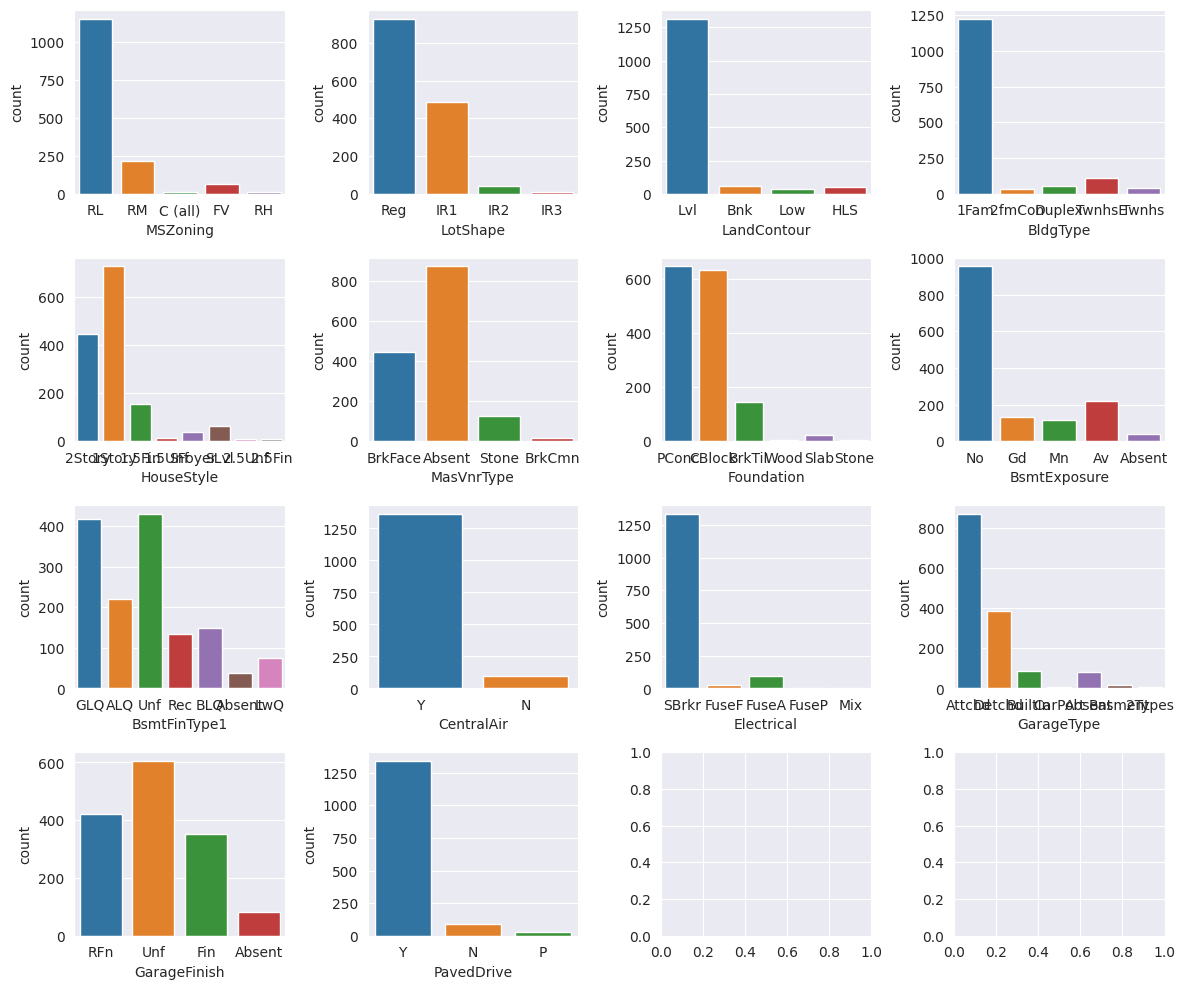

In [27]:
fig, ax = plt.subplots(4,4,figsize=(12,10))
ax = ax.flatten()
cols = X_train.select_dtypes(exclude = ['int64','float64']).columns.values
for i in range(14):
    sns.countplot(data = X_train, x = cols[i], ax = ax[i])
fig.tight_layout()

Let's consider unbalanced features

In [28]:
X_train.groupby('CentralAir')['SalePrice'].aggregate(['count','mean'])

,count,mean
CentralAir,,
N,95,105264.073684
Y,1365,186186.709890


In [29]:
X_train[X_train.CentralAir == 'N']['OverallQual'].mean(), X_train['OverallQual'].mean(),  X_train.loc[X_train.OverallQual.isin([4.0,5.0]),'SalePrice'].mean()

(4.673684210526316, 6.0993150684931505, 127847.1052631579)

It seems worth using as lack of AC has impact beyond overallquality

In [30]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse_output = False)
enc.fit(X_train[['CentralAir']])
add_train = enc.transform(X_train[['CentralAir']])
add_train = add_train[['CentralAir_N']]
X_train = X_train.drop(columns = 'CentralAir')
X_train = pd.concat([X_train,add_train],axis=1)

add_test = enc.transform(X_test[['CentralAir']])
add_test = add_test[['CentralAir_N']]
X_test = X_test.drop(columns = 'CentralAir')
X_test = pd.concat([X_test,add_test],axis=1)


In [31]:
X_train.groupby('PavedDrive')['SalePrice'].aggregate(['count','mean'])

,count,mean
PavedDrive,,
N,90,115039.122222
P,30,132330.000000
Y,1340,186433.973881


In [32]:
X_train[X_train.PavedDrive == 'N']['GarageQual'].mean(), X_train['GarageQual'].mean(),  X_train.loc[X_train.GarageQual.isin([2.0]),'SalePrice'].mean()

(0.35111111111111115, 0.5620547945205479, nan)

PavedDrive seems to be largely subsumed in GarageQuality. 

In [33]:
X_train = X_train.drop(columns='PavedDrive')
X_test = X_test.drop(columns='PavedDrive')

In [34]:
X_train.groupby('Electrical')['SalePrice'].aggregate(['count','mean'])

,count,mean
Electrical,,
FuseA,94,122196.893617
FuseF,27,107675.444444
FuseP,3,97333.333333
Mix,1,67000.000000
SBrkr,1335,186810.637453


In [35]:
X_train[X_train.Electrical == 'FuseF']['OverallQual'].mean(), X_train['OverallQual'].mean(),  X_train.loc[X_train.OverallQual.isin([5.0]),'SalePrice'].mean()

(4.7407407407407405, 6.0993150684931505, 133523.34760705288)

Let's one-hot-encode 'not SBrkr'

In [36]:
enc = OneHotEncoder(sparse_output = False)
enc.fit(X_train[['Electrical']])
add_train = enc.transform(X_train[['Electrical']])
add_train['Fuse'] = add_train.loc[:,:'Electrical_Mix'].sum(axis=1)
add_train = add_train[['Fuse']]
X_train = X_train.drop(columns = 'Electrical')
X_train = pd.concat([X_train,add_train],axis=1)

add_test = enc.transform(X_test[['Electrical']])
add_test['Fuse'] = add_test.loc[:,:'Electrical_Mix'].sum(axis=1)
add_test = add_test[['Fuse']]
X_test = X_test.drop(columns = 'Electrical')
X_test = pd.concat([X_test,add_test],axis=1)


In [37]:
X_train_copy.groupby('BldgType').agg(count = ('SalePrice', 'count'),meanPrice = ('SalePrice', 'mean'), avgQual = ('OverallQual', 'mean'), std = ('SalePrice', 'std'))

,count,meanPrice,avgQual,std
BldgType,,,,
1Fam,1220,185763.807377,6.121311,82648.502922
2fmCon,31,128432.258065,4.935484,35458.545158
Duplex,52,133541.076923,4.961538,27833.249197
Twnhs,43,135911.627907,6.069767,41013.222080
TwnhsE,114,181959.342105,6.710526,60626.108918


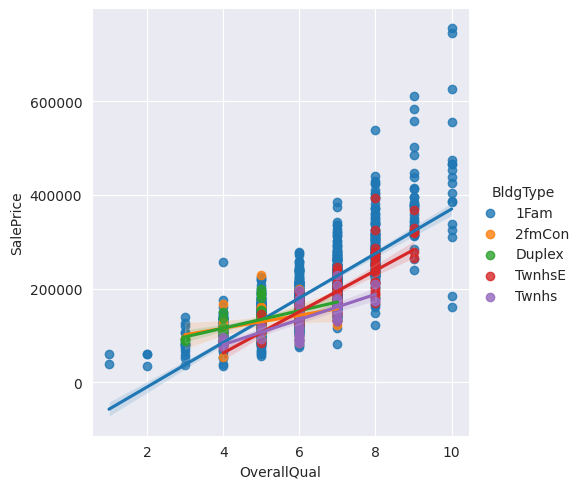

In [38]:
sns.lmplot(data = X_train_copy, x = 'OverallQual', y = 'SalePrice', hue = 'BldgType')

BldgType separates data, let's one got encode it, after merging 2fmCon and Duplex into one column

In [39]:
enc = OneHotEncoder(sparse_output = False)
enc.fit(X_train[['BldgType']])
add_train = enc.transform(X_train[['BldgType']])
add_train['BldgType_Duplex'] = add_train['BldgType_Duplex'] + add_train['BldgType_2fmCon']
add_train = add_train.drop(columns = 'BldgType_2fmCon')
X_train = X_train.drop(columns = 'BldgType')
X_train = pd.concat([X_train,add_train],axis=1)

add_test = enc.transform(X_test[['BldgType']])
add_test['BldgType_Duplex'] = add_test['BldgType_Duplex'] + add_test['BldgType_2fmCon']
add_test = add_test.drop(columns = 'BldgType_2fmCon')
X_test = X_test.drop(columns = 'BldgType')
X_test = pd.concat([X_test,add_test],axis=1)

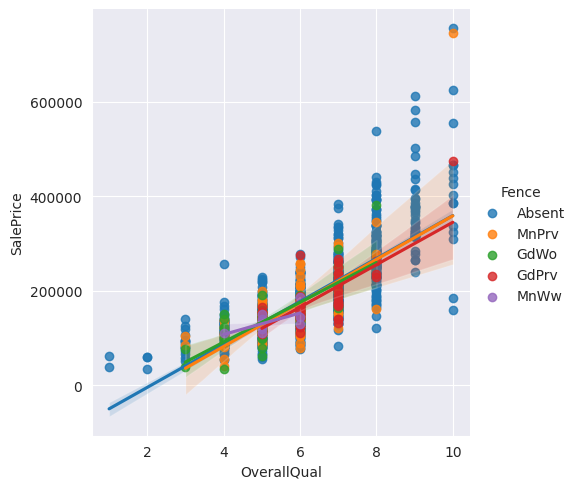

In [40]:
sns.lmplot(data = X_train_copy, x = 'OverallQual', y = 'SalePrice', hue = 'Fence')

no separation, let's drop it

In [41]:
X_train = X_train.drop(columns='Fence')
X_test = X_test.drop(columns='Fence')

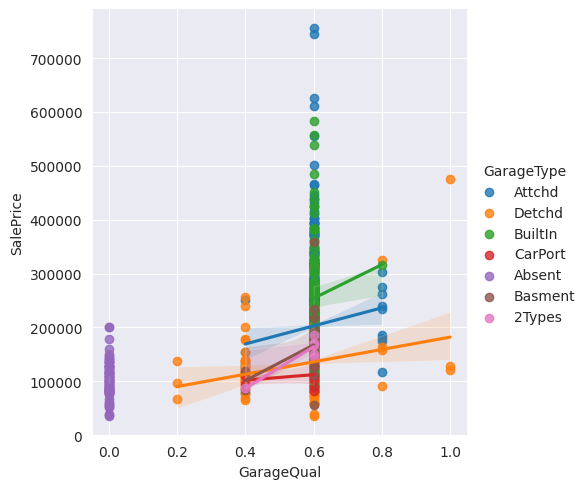

In [42]:
sns.lmplot(data = X_train_copy, x = 'GarageQual', y = 'SalePrice', hue = 'GarageType')

In [43]:
X_train_copy.groupby('GarageType').agg(count = ('SalePrice', 'count'),meanPrice = ('SalePrice', 'mean'), avgQual = ('OverallQual', 'mean'), std = ('SalePrice', 'std'))

,count,meanPrice,avgQual,std
GarageType,,,,
2Types,6,151283.333333,5.000000,34917.068415
Absent,81,103317.283951,4.604938,32815.023389
Attchd,870,202892.656322,6.506897,77146.621778
Basment,19,160570.684211,5.789474,63967.283574
BuiltIn,88,254751.738636,7.181818,102230.854394
CarPort,9,109962.111111,4.333333,24638.183681
Detchd,387,134091.162791,5.322997,41391.549953


Let's select Attchd, BuiltIn and Detchd for one-hot encoding

In [44]:
enc = OneHotEncoder(sparse_output = False)
enc.fit(X_train[['GarageType']])
add_train = enc.transform(X_train[['GarageType']])
add_train = add_train[['GarageType_Attchd','GarageType_BuiltIn','GarageType_Detchd']]
X_train = X_train.drop(columns = 'GarageType')
X_train = pd.concat([X_train,add_train],axis=1)

add_test = enc.transform(X_test[['GarageType']])
add_test = add_test[['GarageType_Attchd','GarageType_BuiltIn','GarageType_Detchd']]
X_test = X_test.drop(columns = 'GarageType')
X_test = pd.concat([X_test,add_test],axis=1)

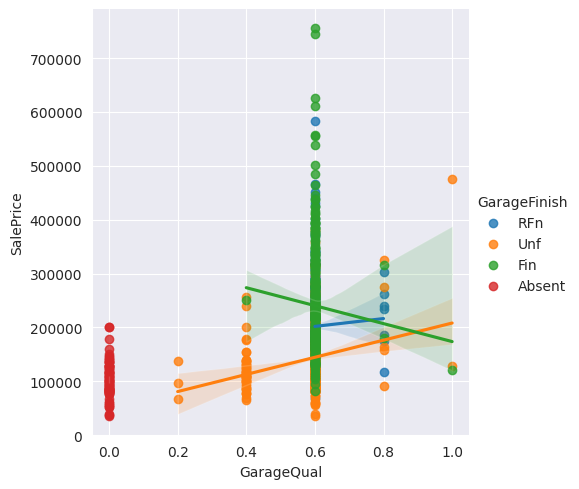

In [45]:
sns.lmplot(data = X_train_copy, x = 'GarageQual', y = 'SalePrice', hue = 'GarageFinish')

In [46]:
X_train_copy.groupby('GarageFinish').agg(count = ('SalePrice', 'count'),meanPrice = ('SalePrice', 'mean'), avgQual = ('OverallQual', 'mean'), std = ('SalePrice', 'std'))

,count,meanPrice,avgQual,std
GarageFinish,,,,
Absent,81,103317.283951,4.604938,32815.023389
Fin,352,240052.690341,7.068182,96960.593232
RFn,422,202068.869668,6.573460,63536.222518
Unf,605,142156.423140,5.404959,46498.528211


Clearly some important relationship here

In [47]:
enc = OneHotEncoder(sparse_output = False)
enc.fit(X_train[['GarageFinish']])
add_train = enc.transform(X_train[['GarageFinish']])
add_train = add_train[['GarageFinish_Fin','GarageFinish_RFn','GarageFinish_Unf']]
X_train = X_train.drop(columns = 'GarageFinish')
X_train = pd.concat([X_train,add_train],axis=1)

add_test = enc.transform(X_test[['GarageFinish']])
add_test = add_test[['GarageFinish_Fin','GarageFinish_RFn','GarageFinish_Unf']]
X_test = X_test.drop(columns = 'GarageFinish')
X_test = pd.concat([X_test,add_test],axis=1)

In [48]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

def eval_dataset(dataset, target):
    def score_func(y,y_pred,**kwargs):
        return np.sqrt(mean_squared_error(np.log(y),np.log(y_pred)))

    scorer = make_scorer(score_func = score_func, greater_is_better = False)

    model = XGBRegressor(n_estimators = 200)
    print(cross_val_score(model, dataset, target, scoring = scorer).mean())

In [49]:
eval_dataset(X_train.loc[:,X_train.columns != 'SalePrice'].select_dtypes(include=['int64', 'float64']),y_train)
eval_dataset(X_train_copy.loc[:,X_train_copy.columns != 'SalePrice'].select_dtypes(include=['int64', 'float64']),y_train)

-0.14213823214769658
-0.14566469145087288


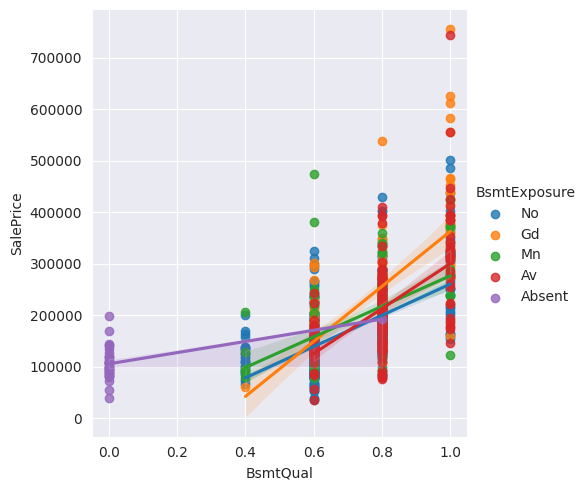

In [50]:
sns.lmplot(data=X_train_copy, x='BsmtQual', y='SalePrice', hue = 'BsmtExposure')

In [51]:
X_train_copy.groupby('BsmtExposure').agg(count = ('SalePrice', 'count'),meanPrice = ('SalePrice', 'mean'), avgQual = ('OverallQual', 'mean'), std = ('SalePrice', 'std'))

,count,meanPrice,avgQual,std
BsmtExposure,,,,
Absent,38,107938.342105,4.368421,32133.440664
Av,221,206643.420814,6.570136,88655.504849
Gd,134,257689.805970,6.962687,118923.672583
Mn,114,192789.657895,6.254386,77335.442652
No,953,165652.295908,5.919203,60695.724915


Let's one-hot encode

In [52]:
enc = OneHotEncoder(sparse_output = False)
enc.fit(X_train[['BsmtExposure']])
add_train = enc.transform(X_train[['BsmtExposure']])
add_train = add_train[['BsmtExposure_Av','BsmtExposure_Gd','BsmtExposure_Mn','BsmtExposure_No']]
X_train = X_train.drop(columns = 'BsmtExposure')
X_train = pd.concat([X_train,add_train],axis=1)

add_test = enc.transform(X_test[['BsmtExposure']])
add_test = add_test[['BsmtExposure_Av','BsmtExposure_Gd','BsmtExposure_Mn','BsmtExposure_No']]
X_test = X_test.drop(columns = 'BsmtExposure')
X_test = pd.concat([X_test,add_test],axis=1)


In [53]:
eval_dataset(X_train.loc[:,X_train.columns != 'SalePrice'].select_dtypes(include=['int64', 'float64']),y_train)

-0.14133998536769216


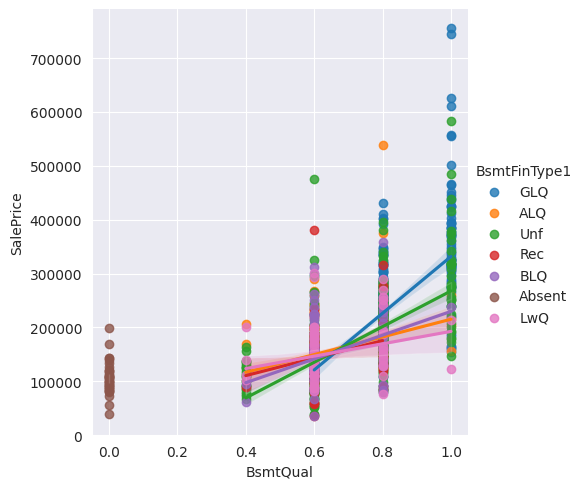

In [54]:
sns.lmplot(data=X_train_copy, x='BsmtQual', y='SalePrice', hue = 'BsmtFinType1')

In [55]:
X_train_copy.groupby('BsmtFinType1').agg(count = ('SalePrice', 'count'),meanPrice = ('SalePrice', 'mean'), avgQual = ('OverallQual', 'mean'), std = ('SalePrice', 'std'))

,count,meanPrice,avgQual,std
BsmtFinType1,,,,
ALQ,220,161573.068182,5.550000,50821.277231
Absent,37,105652.891892,4.297297,29278.694797
BLQ,148,149493.655405,5.351351,47327.292126
GLQ,418,235413.720096,7.045455,93215.613258
LwQ,74,151852.702703,5.540541,50796.987083
Rec,133,146889.248120,5.353383,45190.118879
Unf,430,170670.576744,6.200000,72577.080129


Good separation, Let's encode

In [56]:
'''enc = OneHotEncoder(sparse_output = False)
enc.fit(X_train[['BsmtFinType1']])
add_train = enc.transform(X_train[['BsmtFinType1']])
add_train = add_train[['BsmtFinType1_ALQ','BsmtFinType1_BLQ','BsmtFinType1_GLQ','BsmtFinType1_LwQ','BsmtFinType1_Rec','BsmtFinType1_Unf']]
X_train = X_train.drop(columns = 'BsmtFinType1')
X_train = pd.concat([X_train,add_train],axis=1)

add_test = enc.transform(X_test[['BsmtFinType1']])
add_test = add_test[['BsmtFinType1_ALQ','BsmtFinType1_BLQ','BsmtFinType1_GLQ','BsmtFinType1_LwQ','BsmtFinType1_Rec','BsmtFinType1_Unf']]
X_test = X_test.drop(columns = 'BsmtFinType1')
X_test = pd.concat([X_test,add_test],axis=1)'''

"enc = OneHotEncoder(sparse_output = False)\nenc.fit(X_train[['BsmtFinType1']])\nadd_train = enc.transform(X_train[['BsmtFinType1']])\nadd_train = add_train[['BsmtFinType1_ALQ','BsmtFinType1_BLQ','BsmtFinType1_GLQ','BsmtFinType1_LwQ','BsmtFinType1_Rec','BsmtFinType1_Unf']]\nX_train = X_train.drop(columns = 'BsmtFinType1')\nX_train = pd.concat([X_train,add_train],axis=1)\n\nadd_test = enc.transform(X_test[['BsmtFinType1']])\nadd_test = add_test[['BsmtFinType1_ALQ','BsmtFinType1_BLQ','BsmtFinType1_GLQ','BsmtFinType1_LwQ','BsmtFinType1_Rec','BsmtFinType1_Unf']]\nX_test = X_test.drop(columns = 'BsmtFinType1')\nX_test = pd.concat([X_test,add_test],axis=1)"

In [57]:
'''eval_dataset(X_train.loc[:,X_train.columns != 'SalePrice'].select_dtypes(include=['int64', 'float64']),y_train)'''

"eval_dataset(X_train.loc[:,X_train.columns != 'SalePrice'].select_dtypes(include=['int64', 'float64']),y_train)"

'BsmtFinType1' decreased accuracy of our test model, Let's drop it instead

In [58]:
X_train = X_train.drop(columns = 'BsmtFinType1')
X_test = X_test.drop(columns = 'BsmtFinType1')


In [59]:
X_train.select_dtypes(exclude = ['int64', 'float64']).columns

Index(['MSZoning', 'LotShape', 'LandContour', 'HouseStyle', 'MasVnrType',
       'Foundation'],
      dtype='object')

In [60]:
X_train_copy.groupby('MSZoning').agg(count = ('SalePrice', 'count'),meanPrice = ('SalePrice', 'mean'), avgQual = ('OverallQual', 'mean'), std = ('SalePrice', 'std'))

,count,meanPrice,avgQual,std
MSZoning,,,,
C (all),10,74528.000000,3.900000,33791.092031
FV,65,214014.061538,7.200000,52369.662067
RH,16,131558.375000,5.250000,35714.118435
RL,1151,191004.994787,6.190269,80766.341319
RM,218,126316.830275,5.454128,48521.689833


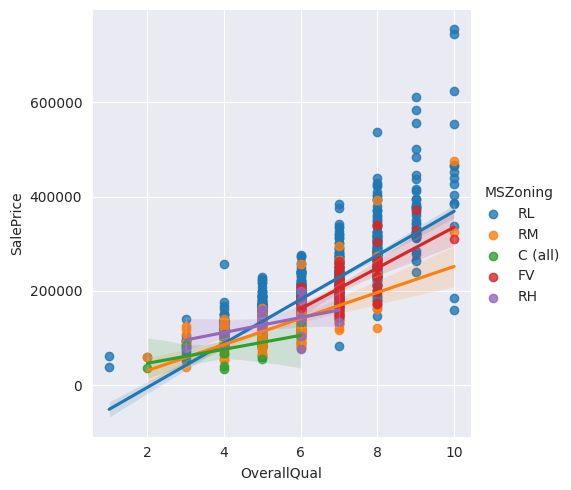

In [61]:
sns.lmplot(data=X_train_copy, x='OverallQual', y='SalePrice', hue = 'MSZoning')

I would encode only RL and RM as they are clearly separated and have high count. Other categories probably are distinguished simply by general building charcteristics of their respective type

In [62]:
enc = OneHotEncoder(sparse_output = False)
enc.fit(X_train[['MSZoning']])
add_train = enc.transform(X_train[['MSZoning']])
add_train = add_train[['MSZoning_RL','MSZoning_RM']]
X_train = X_train.drop(columns = 'MSZoning')
X_train = pd.concat([X_train,add_train],axis=1)

add_test = enc.transform(X_test[['MSZoning']])
add_test = add_test[['MSZoning_RL','MSZoning_RM']]
X_test = X_test.drop(columns = 'MSZoning')
X_test = pd.concat([X_test,add_test],axis=1)

In [63]:
eval_dataset(X_train.loc[:,X_train.columns != 'SalePrice'].select_dtypes(include=['int64', 'float64']),y_train)

-0.14085068660167918


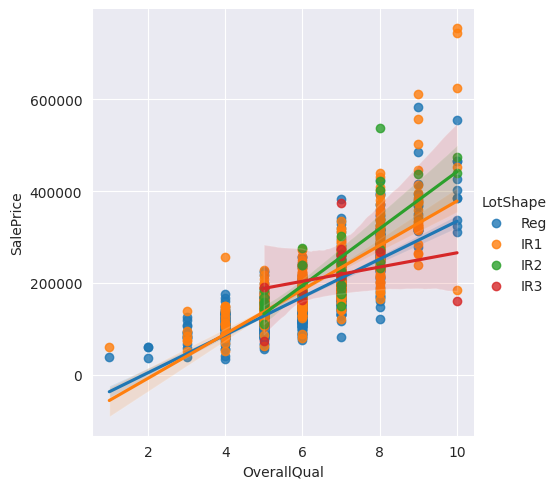

In [64]:
sns.lmplot(data=X_train_copy, x='OverallQual', y='SalePrice', hue = 'LotShape')

Let's try clustering to hangle 'LandSlope', 'LandContour', 'LotShape', LotConfig'. But I have to add 'LandSlope' and 'LotConfig', because I removed them before

In [65]:
X_train = pd.concat([X_train, X_train_copy[['LandSlope','LotConfig']]], axis=1)
X_test = pd.concat([X_test, X_test_copy[['LandSlope','LotConfig']]], axis=1)

In [66]:
enc = OneHotEncoder(sparse_output = False)
enc.fit(X_train[['LandSlope', 'LandContour', 'LotShape', 'LotConfig']])
train_encoded = enc.transform(X_train[['LandSlope', 'LandContour', 'LotShape', 'LotConfig']])
#test_encoded = enc.transform(X_test[['LandSlope', 'LandContour', 'LotShape', 'LotConfig']])
cluster_cols_train = X_train[['LandSlope', 'LandContour', 'LotShape', 'LotConfig']]
cluster_cols_test = X_test[['LandSlope', 'LandContour', 'LotShape', 'LotConfig']]

In [67]:
from kmodes.kmodes import KModes
from sklearn.metrics import silhouette_score

'''dataset = X_train.loc[:,X_train.columns != 'SalePrice'].select_dtypes(include=['int64', 'float64'])

eval_dataset(X_train.loc[:,X_train.columns != 'SalePrice'].select_dtypes(include=['int64', 'float64']),y_train)
eval_dataset(pd.concat([dataset,train_encoded], axis=1),y_train)

for i in range(2,5):
    km = KModes(n_clusters = i,random_state=0)
    clusters = km.fit_predict(cluster_cols)
    cluster_cols['clusters'] = clusters
    eval_dataset(pd.concat([dataset,cluster_cols['clusters']], axis=1),y_train)'''

"dataset = X_train.loc[:,X_train.columns != 'SalePrice'].select_dtypes(include=['int64', 'float64'])\n\neval_dataset(X_train.loc[:,X_train.columns != 'SalePrice'].select_dtypes(include=['int64', 'float64']),y_train)\neval_dataset(pd.concat([dataset,train_encoded], axis=1),y_train)\n\nfor i in range(2,5):\n    km = KModes(n_clusters = i,random_state=0)\n    clusters = km.fit_predict(cluster_cols)\n    cluster_cols['clusters'] = clusters\n    eval_dataset(pd.concat([dataset,cluster_cols['clusters']], axis=1),y_train)"

We see that indeed encoding with 2 clusters provides some benefit. Let; use it

In [68]:
km = KModes(n_clusters = 2,random_state=0)
km.fit(cluster_cols_train)
X_train['Land_type_clusters'] = km.predict(cluster_cols_train).astype('int64')
X_train = X_train.drop(columns = ['LandSlope', 'LandContour', 'LotShape', 'LotConfig'])
X_test['Land_type_clusters'] = km.predict(cluster_cols_test).astype('int64')
X_test = X_test.drop(columns = ['LandSlope', 'LandContour', 'LotShape', 'LotConfig'])

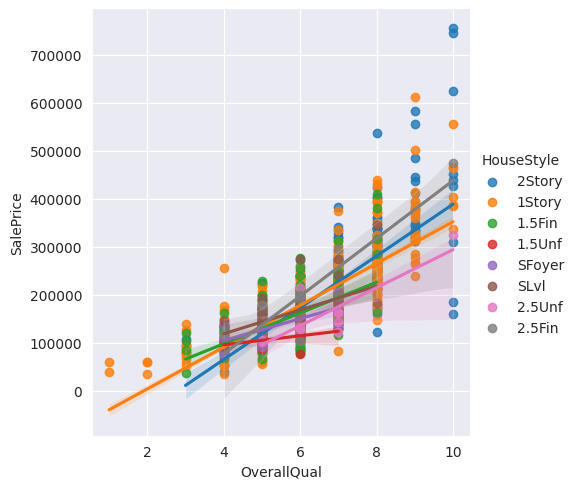

In [69]:
sns.lmplot(data=X_train_copy, x='OverallQual', y='SalePrice', hue = 'HouseStyle')

In [70]:
X_train_copy.groupby('HouseStyle').agg(count = ('SalePrice', 'count'),meanPrice = ('SalePrice', 'mean'), avgQual = ('OverallQual', 'mean'), std = ('SalePrice', 'std'))

,count,meanPrice,avgQual,std
HouseStyle,,,,
1.5Fin,154,143116.740260,5.402597,54277.941119
1.5Unf,14,110150.000000,5.500000,19036.473090
1Story,726,175985.477961,5.946281,77055.715011
2.5Fin,8,220000.000000,6.375000,118211.976671
2.5Unf,11,157354.545455,6.545455,63934.128032
2Story,445,210051.764045,6.683146,87339.213570
SFoyer,37,135074.486486,5.324324,30480.898192
SLvl,65,166703.384615,5.923077,38305.161339


This feature looks suspicious, let's drop it

In [71]:
X_train = X_train.drop(columns = 'HouseStyle')
X_test = X_test.drop(columns = 'HouseStyle')

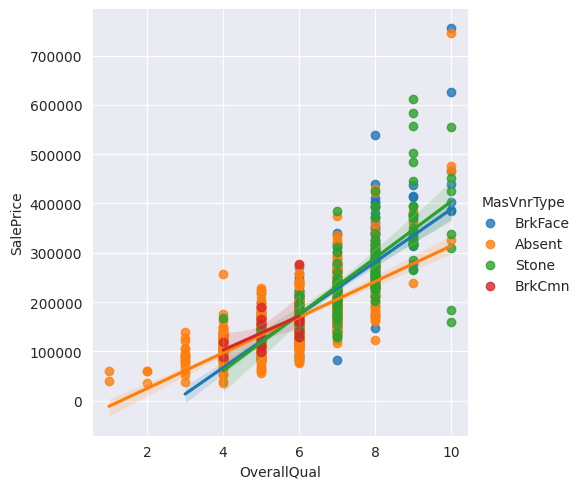

In [72]:
sns.lmplot(data=X_train_copy, x='OverallQual', y='SalePrice', hue = 'MasVnrType')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

<Axes: xlabel='MasVnrArea', ylabel='Count'>

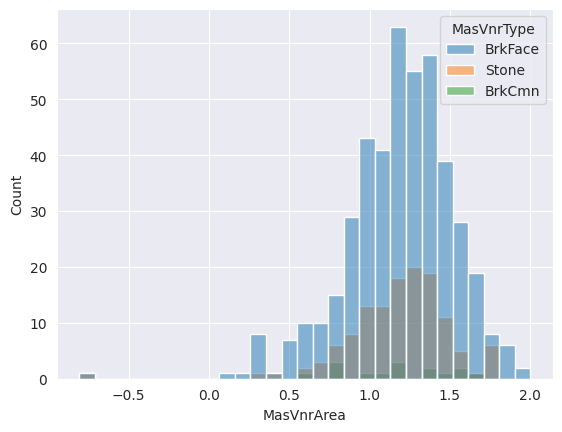

In [73]:
sns.histplot(data = X_train_copy[X_train_copy.MasVnrType != 'Absent'], x='MasVnrArea', hue = 'MasVnrType')

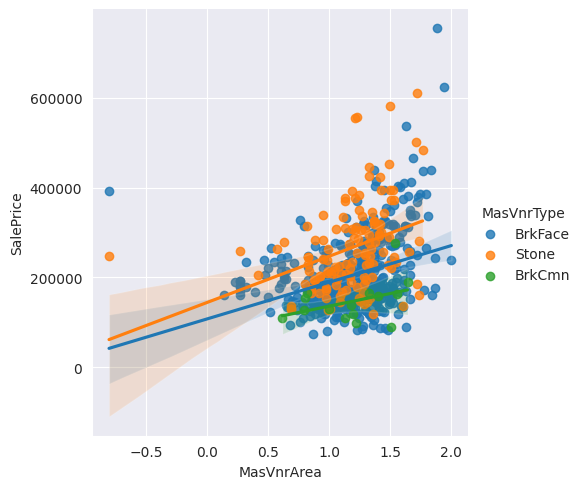

In [74]:
sns.lmplot(data = X_train_copy[X_train_copy.MasVnrType != 'Absent'], x='MasVnrArea', y='SalePrice', hue = 'MasVnrType')

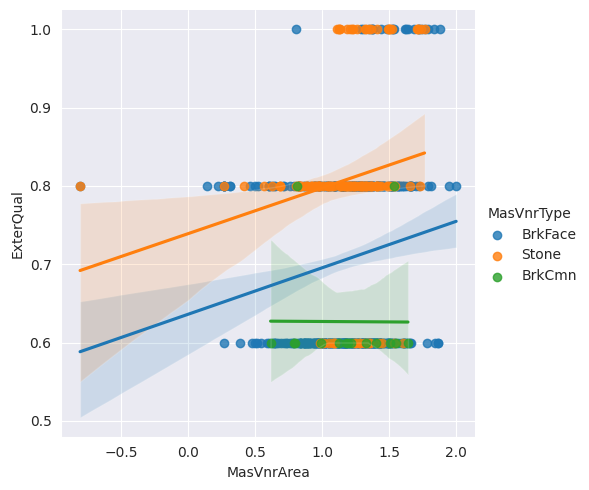

In [75]:
sns.lmplot(data = X_train_copy[X_train_copy.MasVnrType != 'Absent'], x='MasVnrArea', y='ExterQual', hue = 'MasVnrType')

Veneer Type and Area are probably included in general exterior quality and house size, but we can try using combined feature of Type multiplied by Area

In [76]:
enc = OneHotEncoder(sparse_output = False)
enc.fit(X_train[['MasVnrType']])

train_encoded = enc.transform(X_train[['MasVnrType']])
train_encoded = train_encoded.mul(X_train_copy['MasVnrArea'], axis = 0)

In [77]:
before = X_train.loc[:,X_train.columns != 'SalePrice'].select_dtypes(include=['int64', 'float64'])
eval_dataset(before,y_train)
after = pd.concat([before,train_encoded], axis=1)
eval_dataset(after,y_train)

-0.13991503121679552
-0.14439096189508618


It doesn't improve model. Let's drop it.

In [78]:
X_train = X_train.drop(columns = 'MasVnrType')
X_test = X_test.drop(columns = 'MasVnrType')

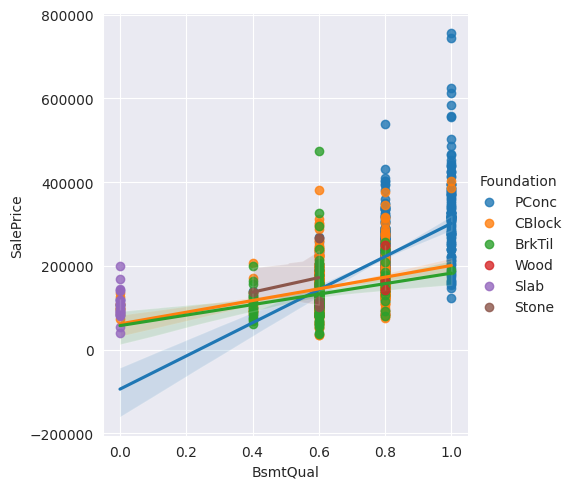

In [79]:
sns.lmplot(data=X_train_copy, x='BsmtQual', y='SalePrice', hue = 'Foundation')

In [80]:
X_train_copy.groupby('Foundation').agg(count = ('SalePrice', 'count'),meanPrice = ('SalePrice', 'mean'), avgQual = ('OverallQual', 'mean'), std = ('SalePrice', 'std'))

,count,meanPrice,avgQual,std
Foundation,,,,
BrkTil,146,132291.075342,5.445205,54592.393032
CBlock,634,149805.714511,5.421136,48295.041759
PConc,647,225230.442040,6.979907,86865.977283
Slab,24,107365.625000,4.291667,34213.980939
Stone,6,165959.166667,5.666667,78557.704413
Wood,3,185666.666667,6.666667,56695.090910


'Foundation seems to be largely subsumed by BasementQuality'

In [81]:
X_train = X_train.drop(columns = 'Foundation')
X_test = X_test.drop(columns = 'Foundation')

In [82]:
X_train = X_train.drop(columns = 'SalePrice')
y_train = np.log1p(y_train)

In [83]:
import optuna

def objective(trial):
    n_estimators = trial.suggest_int('n_estimators',50,500)
    learning_rate = trial.suggest_float('learning_rate',0.01,1)
    max_depth = trial.suggest_int('max_depth',4,10)
    min_child_weight = trial.suggest_float('min_child_weight',0.5,300)
    colsample_bytree = trial.suggest_float('colsample_bytree',0.5,1)
    subsample = trial.suggest_float('subsample',0.3,1)
    gamma = trial.suggest_float('gamma',0,1)
    
    model = XGBRegressor(n_estimators = n_estimators, learning_rate=learning_rate, max_depth = max_depth, min_child_weight=min_child_weight,
                         colsample_bytree = colsample_bytree, subsample = subsample, gamma=gamma)
    
    def score_func(y,y_pred,**kwargs):
        return np.sqrt(mean_squared_error(y,y_pred))

    scorer = make_scorer(score_func = score_func, greater_is_better = False)

    return -cross_val_score(model, X_train, y_train, scoring=scorer).mean()

In [84]:
'''study = optuna.create_study(study_name = 'study1',direction = 'minimize' )'''

"study = optuna.create_study(study_name = 'study1',direction = 'minimize' )"

In [85]:
'''study.optimize(objective,n_trials = 100)'''

'study.optimize(objective,n_trials = 100)'

In [86]:
'''study.best_value, study.best_params'''

'study.best_value, study.best_params'

Results for first model:
(0.12652373081288243,
 {'n_estimators': 352,
  'learning_rate': 0.047935107715732846,
  'max_depth': 4,
  'min_child_weight': 0.6374177015572778,
  'colsample_bytree': 0.7795478042884203,
  'subsample': 0.8786526709010186,
  'gamma': 0.6998587483825114})

Results for second model (log transforms, some scaling):
(0.1283606237056913,
 {'n_estimators': 486,
  'learning_rate': 0.03979749774336471,
  'max_depth': 5,
  'min_child_weight': 0.542474473506595,
  'colsample_bytree': 0.7833053489949294,
  'subsample': 0.5296418681985633,
  'gamma': 0.04260973397685179})

In [87]:
model = XGBRegressor(n_estimators=486, learning_rate=0.03979749774336471, max_depth= 5, min_child_weight=0.542474473506595, colsample_bytree= 0.7833053489949294, subsample= 0.5296418681985633, gamma= 0.04260973397685179)
model.fit(X_train, y_train)
preds = model.predict(X_test)
preds = np.expm1(preds)

In [88]:
X_test['SalePrice'] = preds
res = X_test[['SalePrice']]
res = res.reset_index()
res

,Id,SalePrice
0,1461,119550.960938
1,1462,150606.000000
2,1463,180152.125000
3,1464,191399.750000
4,1465,177984.687500
...,...,...
1454,2915,89218.953125
1455,2916,94395.593750
1456,2917,174167.515625
1457,2918,127718.804688


In [89]:
res.to_csv('solution.csv', index=False)
